# TP1_Whitepatch & Histograma

White patch
Histograma

In [1]:
#Si queremos que las imágenes sean mostradas en una ventana emergente quitar el inline
%matplotlib inline

# OpenCV-Python utiliza NumPy para el manejo de imágenes
import numpy as np
# cv2 es el módulo python para acceder a OpenCV 
import cv2 as cv
# Usamos las poderosas herramientas de graficación de matplotlib para mostrar imágenes, perfiles, histogramas, etc
import matplotlib.pyplot as plt


In [ ]:
#  Parte 1 (imágenes en white_patch y coord_cromaticas)
#  1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
# Cargar una imagen en modo monocromático (un canal)

img = cv.imread('test_blue.png',cv.IMREAD_GRAYSCALE)
# Como lucen los datos en un np.array
print(img.shape)

# Dimensión de la imagen
print(f'Tamaño imagen: {img.shape} pix')
print(img)

In [ ]:
#  Parte 1 (imágenes en white_patch y coord_cromaticas)
# 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
# Muestro la imagen con matplotlib
plt.figure()
plt.imshow(img)
plt.show()

# Qué pasó con la visualización ?
# Se observa la imagen en Negro - Verde...

In [ ]:
#  Parte 1 (imágenes en white_patch y coord_cromaticas)
# 1. Implementar el algoritmo de pasaje a coordenadas cromáticas para librarnos de las variaciones de contraste.
# Quiero ver la imagen en tonos de grises
plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

# Qué pasó con la visualización ?
# Se observa la imagen en escala de grises...

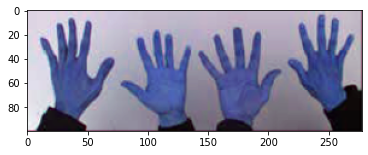

In [4]:
#  Parte 1 (imágenes en white_patch y coord_cromaticas)
# 2. Implementar el algoritmo White Patch para librarnos de las diferencias de color de iluminación.
# Cargo imagen en la que se aplicará White Patch
#img = cv.imread('wp_red.png')
img = cv.imread('test_blue.png')
# Tomo datos de R, G, B
B,G,R = cv.split(img)

# Busco valor maximo de R, G, B
maxr=np.amax(R)
maxb=np.amax(B)
maxg=np.amax(G)

# Calculo valor de corrección
sr=float(255)/maxr
sg=float(255)/maxg
sb=float(255)/maxb

# Multiplico valor de corrección por cada R
#x,y = img.shape
#x = 481
#y = 813

x = 278
y = 100

for i in range (0,y-1):
    for j in range (0,x-1):
        (b,g,r)=img[i,j]
        img[i,j]=(int(b*sb),int(g*sg),int(r*sr))

# Muestro imagen
# Muestro la imagen con matplotlib
plt.figure()
plt.imshow(img)
plt.show()

# 3. Mostrar los resultados obtenidos y analizar las posibles fallas (si es que las hay) en el caso de White patch

# Se observa una tendencia hacia los colores azules

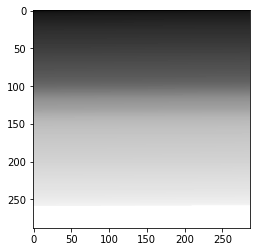

In [9]:
# Parte 2:
# 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
# Cargar una imagen en modo monocromático (un canal)
img = cv.imread('img1_tp.png',cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

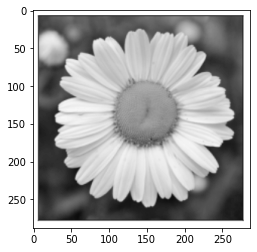

In [10]:
# Parte 2:
# 1. Para las imágenes img1_tp.png y img2_tp.png leerlas con OpenCV en escala de grisas y visualizarlas.
# Cargar una imagen en modo monocromático (un canal)
img = cv.imread('img2_tp.png',cv.IMREAD_GRAYSCALE)

plt.imshow(img, cmap='gray', vmin=0, vmax=255)
plt.show()

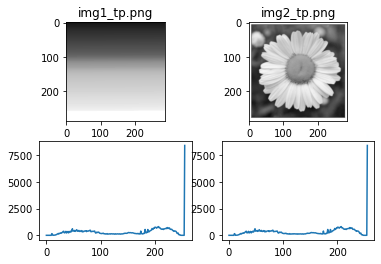

In [11]:
# Parte 2:
# 2.Elija el numero de bins que crea conveniente y grafique su histograma, compare los histogramas entre si.

# Cargar una imagen en modo monocromático (un canal)
img1 = cv.imread('img1_tp.png',cv.IMREAD_GRAYSCALE)

img2 = cv.imread('img2_tp.png',cv.IMREAD_GRAYSCALE)

# Nueva figura
fig = plt.figure()

# Imagen: img1_tp.png
ax1=plt.subplot(221)
ax1.imshow(img1, cmap='gray', vmin=0, vmax=255)
ax1.set_title('img1_tp.png')

hist1,bins1 = np.histogram(img1.ravel(),256,[0,256])
ax3=plt.subplot(223)
ax3.plot(hist1)

# Imagen: img2_tp.png
ax2=plt.subplot(222)
ax2.imshow(img2, cmap='gray', vmin=0, vmax=255)
ax2.set_title('img2_tp.png')

hist2,bins2 = np.histogram(img2.ravel(),256,[0,256])
ax4=plt.subplot(224)
ax4.plot(hist2)


plt.show()


# Explicar lo que se observa, si tuviera que entrenar un modelo de clasificación/detección de imágenes,considera que puede ser de utilidad tomar como ‘ features ’ a los histogramas

# Se observa la comparacion de los histogramas en ambas imagenes. Con la misma cantidad de bins, se observa un histograma similar. Si se puede tomar caracteristicas en base a los histogramas.


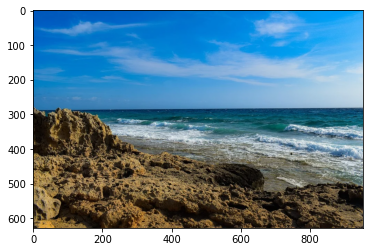

In [12]:
# Parte 2:
# 3. Para la imagen segmentacion.png analice el histograma de los canales RGB.
# Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.
img_seg = cv.imread('segmentacion.png')

plt.imshow(img_seg[:,:,::-1])
plt.show()

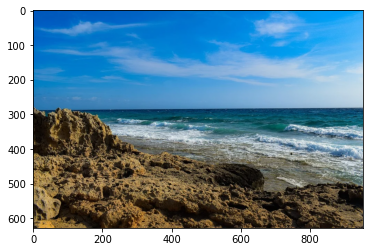

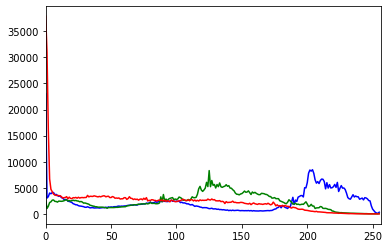

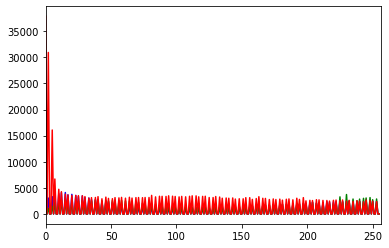

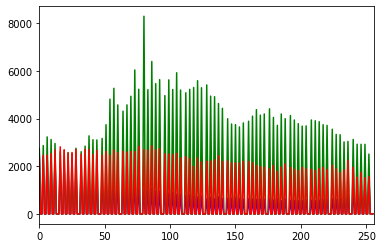

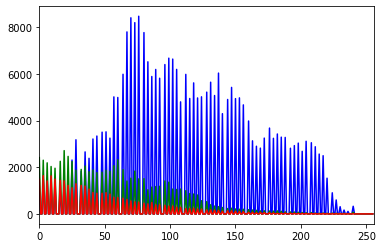

In [33]:
# Parte 2:
# 3. Para la imagen segmentacion.png analice el histograma de los canales RGB.
# Segmente algunos de los elementos presentes en la imagen (agua, cielo, tierra) y muestre, aplicando mascaras, las regiones en imágenes separadas.
img_seg = cv.imread('segmentacion.png')

plt.imshow(img_seg[:,:,::-1])
plt.show()


color = ('b','g','r')

for i, c in enumerate(color):
    hist = cv.calcHist([img_seg], [i], None, [256], [0, 256])
    plt.plot(hist, color = c)
    plt.xlim([0,256])

plt.show()

# Mostrar en regiones sepradas
for i, c in enumerate(color):
    hist_a = cv.calcHist([img_seg], [i], None, [256], [0, 100])
    plt.plot(hist_a, color = c)
    plt.xlim([0,256])
plt.show()



# Mostrar en regiones sepradas
for i, c in enumerate(color):
    hist = cv.calcHist([img_seg], [i], None, [256], [100, 180])
    plt.plot(hist, color = c)
    plt.xlim([0,256])

plt.show()

# Mostrar en regiones sepradas
for i, c in enumerate(color):
    hist = cv.calcHist([img_seg], [i], None, [256], [180, 260])
    plt.plot(hist, color = c)
    plt.xlim([0,256])

plt.show()